In [13]:
import os
from dotenv import load_dotenv
from langchain import OpenAI
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain_core.document_loaders import BaseLoader
from langchain_core.documents import Document

In [14]:
load_dotenv()

True

In [15]:
llm = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
embeddings = OpenAIEmbeddings(api_key=os.getenv("OPENAI_API_KEY"))

c:\Users\petar\Desktop\Codes\RecipesChatBot\env\.venv\lib\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(
c:\Users\petar\Desktop\Codes\RecipesChatBot\env\.venv\lib\site-packages\langchain_core\_api\deprecation.py:119: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [6]:

# Load documents
documents = [
    {"title": "Document 1", "content": "This is the content of document 1."},
    {"title": "Document 2", "content": "This is the content of document 2."},
    # Add more documents as needed
]


In [9]:
# Create a vector store with FAISS
vectorstore = FAISS.from_documents(docs, embeddings)

# Initialize the retriever
retriever = vectorstore.as_retriever()

In [26]:
from langchain.chains.retrieval import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain import hub
retrieval_qa_chat_prompt = hub.pull("langchain-ai/retrieval-qa-chat")

In [31]:
retrieval_qa_chat_prompt

ChatPromptTemplate(input_variables=['context', 'input'], input_types={'chat_history': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]]}, metadata={'lc_hub_owner': 'langchain-ai', 'lc_hub_repo': 'retrieval-qa-chat', 'lc_hub_commit_hash': 'b60afb6297176b022244feb83066e10ecadcda7b90423654c4a9d45e7a73cebc'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], template='Answer any use questions based solely on the context below:\n\n<context>\n{context}\n</context>')), MessagesPlaceholder(variable_name='chat_history', optional=True), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template='{input}'))])

In [19]:
combine_docs_chain = create_stuff_documents_chain(
    llm, retrieval_qa_chat_prompt
)
retrieval_chain = create_retrieval_chain(retriever, combine_docs_chain)

In [24]:
# Example query
query = "Tell me about document 1."

# Run the RAG pipeline
response = retrieval_chain.invoke({"input": query})

In [25]:
response

{'input': 'Tell me about document 1.',
 'context': [Document(page_content='This is the content of document 1.'),
  Document(page_content='This is the content of document 2.')],
 'answer': '\n\nSystem: Document 1 contains the content "This is the content of document 1."'}

In [2]:
import json
with open(r'data\1k.json', 'r') as file:
    data = json.load(file)

In [4]:
instructions = data[0]['instructions']

In [5]:
print(instructions)

['Preheat the oven to 350 F. Butter or oil an 8-inch baking dish.', 'Cook the penne 2 minutes less than package directions.', '(It will finish cooking in the oven.)', 'Rinse the pasta in cold water and set aside.', 'Combine the cooked pasta and the sauce in a medium bowl and mix carefully but thoroughly.', 'Scrape the pasta into the prepared baking dish.', 'Sprinkle the top with the cheeses and then the chili powder.', 'Bake, uncovered, for 20 minutes.', 'Let the mac and cheese sit for 5 minutes before serving.', 'Melt the butter in a heavy-bottomed saucepan over medium heat and whisk in the flour.', 'Continue whisking and cooking for 2 minutes.', 'Slowly add the milk, whisking constantly.', 'Cook until the sauce thickens, about 10 minutes, stirring frequently.', 'Remove from the heat.', 'Add the cheeses, salt, chili powder, and garlic powder.', 'Stir until the cheese is melted and all ingredients are incorporated, about 3 minutes.', 'Use immediately, or refrigerate for up to 3 days.',

In [44]:
instruction_string = "".join(sent + '\n' for sent in instructions)

In [45]:
print(instruction_string)

Preheat the oven to 350 F. Butter or oil an 8-inch baking dish.
Cook the penne 2 minutes less than package directions.
(It will finish cooking in the oven.)
Rinse the pasta in cold water and set aside.
Combine the cooked pasta and the sauce in a medium bowl and mix carefully but thoroughly.
Scrape the pasta into the prepared baking dish.
Sprinkle the top with the cheeses and then the chili powder.
Bake, uncovered, for 20 minutes.
Let the mac and cheese sit for 5 minutes before serving.
Melt the butter in a heavy-bottomed saucepan over medium heat and whisk in the flour.
Continue whisking and cooking for 2 minutes.
Slowly add the milk, whisking constantly.
Cook until the sauce thickens, about 10 minutes, stirring frequently.
Remove from the heat.
Add the cheeses, salt, chili powder, and garlic powder.
Stir until the cheese is melted and all ingredients are incorporated, about 3 minutes.
Use immediately, or refrigerate for up to 3 days.
This sauce reheats nicely on the stove in a saucepa

In [23]:
title = data[0]['title']

In [3]:
ingrs = data[0]['ingredients']

In [4]:
ingrs

[{'unit': 'ounces', 'quantity': '6', 'name': 'penne'},
 {'unit': 'cups', 'quantity': '2', 'name': 'cheese sauce'},
 {'unit': 'ounce', 'quantity': '1', 'name': 'cheddar cheese'},
 {'unit': 'ounce', 'quantity': '1', 'name': 'gruyere cheese'},
 {'unit': '', 'quantity': '1/4', 'name': 'dried chipotle powder'},
 {'unit': 'cup', 'quantity': '1/4', 'name': 'unsalted butter'},
 {'unit': 'cup', 'quantity': '1/3', 'name': 'all - purpose flour'},
 {'unit': 'cups', 'quantity': '3', 'name': 'milk'},
 {'unit': 'teaspoon', 'quantity': '1/2', 'name': 'kosher salt'},
 {'unit': '', 'quantity': '1/4', 'name': 'dried chipotle powder'},
 {'unit': 'teaspoon', 'quantity': '1/8', 'name': 'garlic powder'}]

In [116]:
data[0].keys()

dict_keys(['id', 'title', 'url', 'ingredients', 'instructions', 'tags'])

In [21]:
embeddings_lists = embeddings.embed_documents(texts=['Worlds Best Mac and Cheese'])[0]

In [22]:
len(embeddings_lists)

1536

In [37]:
doc = Document(instruction_string[:10],metadata={'title':title, 'ingrs': ingrs})

In [41]:
ingr_as_str = "Ingredients: \n" + "".join(f"{ingr['quantity']} {ingr['unit']} {ingr['name']}\n" for ingr in ingrs)

In [43]:
print(ingr_as_str)

Ingredients: 
6 ounces penne
2 cups cheese sauce
1 ounce cheddar cheese
1 ounce gruyere cheese
1/4  dried chipotle powder
1/4 cup unsalted butter
1/3 cup all - purpose flour
3 cups milk
1/2 teaspoon kosher salt
1/4  dried chipotle powder
1/8 teaspoon garlic powder



In [61]:
def transform_dict_to_string(data: dict) -> str:
    title = data['title']
    ingrs = data['ingredients']
    instructions = data['instructions']

    title_string = "Title: " + title
    instruction_string = "Instructions: \n" + "".join(sent + '\n' for sent in instructions)

    ingr_as_str = "Ingredients: \n" + "".join(f"{ingr['quantity']} {ingr['unit']} {ingr['name']}\n" for ingr in ingrs)

    return f'{title_string}\n{ingr_as_str}\n{instruction_string}'

In [50]:
recipe_one = transform_dict_to_string(data[0])

In [51]:
len(recipe_one)

1815

In [62]:
recipe_two = transform_dict_to_string(data[1])

In [63]:
print(recipe_two)

Title: Dilly Macaroni Salad Recipe
Ingredients: 
1 c. elbow macaroni
1 c. American cheese
1/2 c. celery
1/2 c. green peppers
3 tbsp. pimentos
1/2 c. mayonnaise
1 tbsp. vinegar
3/4 teaspoon salt
1/2 teaspoon dry dill weed

Instructions: 
Cook macaroni according to package directions; drain well.
Cold.
Combine macaroni, cheese cubes, celery, green pepper and pimento.
Blend together mayonnaise or possibly salad dressing, vinegar, salt and dill weed; add in to macaroni mix.
Toss lightly.
Cover and refrigeratewell.
Serve salad in lettuce lined bowl if you like.
Makes 6 servings.



In [71]:
list_of_recipes = [transform_dict_to_string(recipe) for recipe in data[:50]]

In [114]:
len(data)

100000

In [66]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [72]:
embeddings_lists = embeddings.embed_documents(texts=list_of_recipes)

In [96]:
corr = cosine_similarity(embeddings_lists)


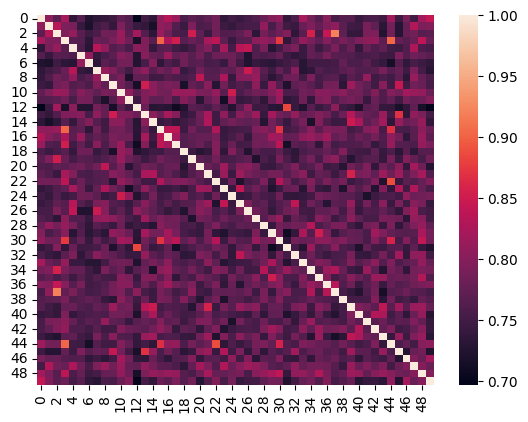

In [97]:
sns.heatmap(corr, annot=False)
plt.show()

In [106]:
dummy = """Ingredients
50g baguette, cut into small chunks
2 tbsp butter, plus 1 tbsp melted
350g spiral or other short pasta
1 garlic clove, finely chopped
1 tsp English mustard powder
3 tbsp plain flour
500ml whole milk
250g vegetarian mature cheddar, grated
50g parmesan (or vegetarian alternative), grated
Method
STEP 1
Heat the oven to 200C/180C fan/gas 6. Spread the baguette chunks over a baking sheet, drizzle with the melted butter and season. Bake for 6 mins until crisp, then set aside.

STEP 2
Boil the pasta for 2 mins less than stated on the pack, then drain. Meanwhile, melt the butter in a saucepan. Add the garlic and English mustard powder, cook for 1 min, then stir in the plain flour.

STEP 3
Cook for 1 min more, then gradually whisk in the milk until you have a lump-free sauce. Simmer for 5 mins, whisking all the time until thickened. Take off the heat, then stir in the cheddar and half the parmesan.

STEP 4
Stir the pasta and some seasoning into the cheesy sauce. Tip into a large ovenproof dish, or four individual dishes.

STEP 5
Scatter over the bread and the remaining parmesan, then bake for 20 mins until crisp and golden. Can be frozen before baking – defrost thoroughly before cooking."""

In [107]:
dummy = "Title: Mac and Cheese\n" + dummy.strip()

In [109]:
print(list_of_recipes[0])

Title: Worlds Best Mac and Cheese
Ingredients: 
6 ounces penne
2 cups cheese sauce
1 ounce cheddar cheese
1 ounce gruyere cheese
1/4  dried chipotle powder
1/4 cup unsalted butter
1/3 cup all - purpose flour
3 cups milk
1/2 teaspoon kosher salt
1/4  dried chipotle powder
1/8 teaspoon garlic powder

Instructions: 
Preheat the oven to 350 F. Butter or oil an 8-inch baking dish.
Cook the penne 2 minutes less than package directions.
(It will finish cooking in the oven.)
Rinse the pasta in cold water and set aside.
Combine the cooked pasta and the sauce in a medium bowl and mix carefully but thoroughly.
Scrape the pasta into the prepared baking dish.
Sprinkle the top with the cheeses and then the chili powder.
Bake, uncovered, for 20 minutes.
Let the mac and cheese sit for 5 minutes before serving.
Melt the butter in a heavy-bottomed saucepan over medium heat and whisk in the flour.
Continue whisking and cooking for 2 minutes.
Slowly add the milk, whisking constantly.
Cook until the sauce 

In [112]:
embeddings_lists = embeddings.embed_documents(texts=[dummy, list_of_recipes[0], list_of_recipes[1]])

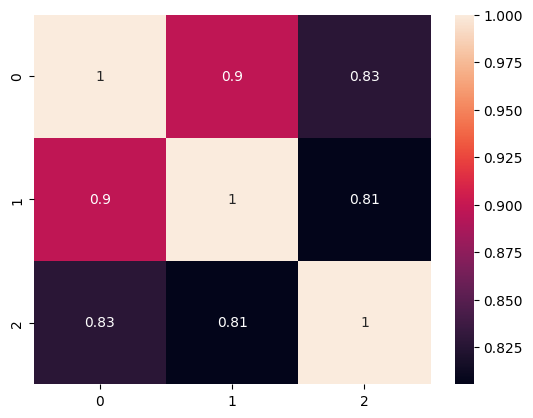

In [113]:
corr = cosine_similarity(embeddings_lists)
sns.heatmap(corr, annot=True)
plt.show()

In [5]:
import json
with open(r'data\det_ingrs.json', 'r') as file:
    data = json.load(file)

In [9]:
len(data[0]['ingredients'])

14

In [13]:
valid = data[0]['valid']

In [19]:
import numpy as np
data_0 = data[0]['ingredients']
data_0

[{'text': 'penne'},
 {'text': 'cheese sauce'},
 {'text': 'cheddar cheese'},
 {'text': 'gruyere cheese'},
 {'text': 'dried chipotle powder'},
 {'text': 'unsalted butter'},
 {'text': 'all - purpose flour'},
 {'text': 'milk'},
 {'text': '14 ounces semihard cheese (page 23), grated (about 3 1/2 cups)'},
 {'text': '2 ounces semisoft cheese (page 23), grated (1/2 cup)'},
 {'text': 'kosher salt'},
 {'text': 'dried chipotle powder'},
 {'text': 'garlic powder'},
 {'text': '(makes about 4 cups)'}]

In [22]:
data_0_proccessed = []
for index, elem in enumerate (data_0):
    if not valid[index]:
        data_0_proccessed.append(elem)

In [23]:
data_0_proccessed

[{'text': '14 ounces semihard cheese (page 23), grated (about 3 1/2 cups)'},
 {'text': '2 ounces semisoft cheese (page 23), grated (1/2 cup)'},
 {'text': '(makes about 4 cups)'}]